The purpose of this project initially was to be able to predict the IMDb score rating that a movie would receive. However, with the various models that can potentially be implemented, the objective shifted to using multiple models, both regression and classification ones, to see which models could generate the best predictions consistently. A total of five models were used: three regression models (linear regression, regression tree, and neural net) and two classification models (logistic regression and random forest). The regression models were used to predict the actual IMDb number score of a particular movie, while the classification models predicted whether the movie would be given a good or bad score. 

DATA CLEANING SECTION:

The following python code was the first step towards obtaining a cleaned data set. Three variables were dropped from the data set first: gross, budget, and plot_keywords. With movies from 66 different countries included in the set, the monetary values were not in one uniform currency, but instead listed according to the currency of the respective country where a particular movie was made. Converting currencies for over 60 countries spanning 100 years would be too time-consuming, resulting in the decision to drop budget and gross from the data set. The column plot_keywords was also dropped because the variance matched closely with movie title, meaning there was minimal significance for that variable. Finally, duplicates were dropped to obtain version 2 of the data set, movie_v2.csv.

In [ ]:
import pandas as pd
import numpy as np
import math as math
## retrieve original data set
movie=pd.read_table('/home/data/MSA8010/msa8010f16t02/movies.csv', sep=',')

In [ ]:
## instantiate all features to be used; exclude gross, budget, and plot_keywords
all_features = set(movie.columns)-set(['gross'])-set(['budget'])-set(['plot_keywords'])
all_features

In [ ]:
## remove any duplicates
titles=movie[['movie_title','country']].drop_duplicates()

## join data frames, then drop columns gross, plot_keywords, and budget
movie2=pd.merge(movie, titles, on=['movie_title','country'])
movie3=movie2.drop(['gross','plot_keywords','budget'],1)

## updated data set in file movie_v2.csv
movie3.to_csv('movie_v2.csv', sep=',')

CORRELATION MATRIX: code & explanation

We decided to investigate the dependence between multiple variables at the same time using the correlation matrix. The result is a table containing the correlation coefficients between each variable and the others.The correlation is a number between -1 and +1 that measures how close the relationship between two variables is to being linear. Correlation = +1 means variables are perfectly positively correlated (they go up and down in perfect synchronization) .-1 means perfect negative correlation (one goes up and the other goes down). Values close to 0 mean either no relation or the relation isn't linear.A correlation matrix is simply a grid of the correlations among all the variables.We decided on a heatmap correlation matrix,since it made decision making and prioritizing simpler.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df=pd.read_csv('/home/data/MSA8010/msa8010f16t02/movie_v4.csv')

In [47]:
df= df.drop(['Unnamed: 0'], axis=1)
df[0:10]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,0,723,178,0,855,0,1000,760505847,0,...,3054,0,0,0,237000000,2009,936,7.9,1.78,33000
1,0,1,302,169,563,1000,1,40000,309404152,1,...,1238,0,0,0,300000000,2007,5000,7.1,2.35,0
2,0,2,602,148,0,161,2,11000,200074175,2,...,994,0,1,0,245000000,2015,393,6.8,2.35,85000
3,0,3,813,164,22000,23000,3,27000,448130642,3,...,2701,0,0,0,250000000,2012,23000,8.5,2.35,164000
4,0,4,462,132,475,530,4,640,73058679,4,...,738,0,0,0,263700000,2012,632,6.6,2.35,24000
5,0,5,392,156,0,4000,5,24000,336530303,5,...,1902,0,0,0,258000000,2007,11000,6.2,2.35,0
6,0,6,324,100,15,284,6,799,200807262,6,...,387,0,0,1,260000000,2010,553,7.8,1.85,29000
7,0,7,635,141,0,19000,7,26000,458991599,4,...,1117,0,0,0,250000000,2015,21000,7.5,2.35,118000
8,0,8,375,153,282,10000,8,25000,301956980,7,...,973,0,1,1,250000000,2009,11000,7.5,2.35,10000
9,0,9,673,183,0,2000,9,15000,330249062,4,...,3018,0,0,0,250000000,2016,4000,6.9,2.35,197000


In [48]:
corr = df.corr()
corr

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
color,1.000000,0.024778,-0.000337,0.048105,0.058951,-0.021618,0.063094,-0.025271,-0.043164,0.072182,...,0.069949,0.030099,0.012683,0.095652,-0.015116,-0.153293,-0.020536,0.117679,-0.051732,-0.024683
director_name,0.024778,1.000000,-0.326218,-0.274091,-0.170614,-0.179135,0.617335,-0.166119,-0.461881,0.316500,...,-0.345151,0.156245,0.167391,0.281612,-0.095273,-0.093135,-0.209107,-0.113680,-0.160319,-0.199524
num_critic_for_reviews,-0.000337,-0.326218,1.000000,0.228631,0.175128,0.252782,-0.303498,0.165986,0.464187,-0.186381,...,0.563684,-0.005706,-0.014652,-0.060873,0.104717,0.420202,0.253125,0.347886,0.180230,0.705226
duration,0.048105,-0.274091,0.228631,1.000000,0.180644,0.125797,-0.219038,0.083632,0.245726,-0.095005,...,0.351595,0.048104,0.050366,-0.011007,0.068012,-0.130211,0.128935,0.366221,0.153027,0.215303
director_facebook_likes,0.058951,-0.170614,0.175128,0.180644,1.000000,0.117405,-0.113248,0.089630,0.138351,-0.070452,...,0.217103,-0.016928,-0.043911,-0.014363,0.018167,-0.044656,0.116058,0.192314,0.037528,0.161962
actor_3_facebook_likes,-0.021618,-0.179135,0.252782,0.125797,0.117405,1.000000,-0.247970,0.252408,0.299864,-0.130865,...,0.205343,-0.055664,-0.062729,-0.105084,0.039966,0.117475,0.553755,0.065544,0.046356,0.271508
actor_2_name,0.063094,0.617335,-0.303498,-0.219038,-0.113248,-0.247970,1.000000,-0.242064,-0.402586,0.333077,...,-0.277483,0.223642,0.200810,0.292132,-0.085954,-0.216133,-0.324549,-0.025613,-0.171199,-0.198260
actor_1_facebook_likes,-0.025271,-0.166119,0.165986,0.083632,0.089630,0.252408,-0.242064,1.000000,0.144010,-0.125831,...,0.121935,-0.067825,-0.067410,-0.064027,0.016418,0.096194,0.391166,0.093597,0.056946,0.130300
gross,-0.043164,-0.461881,0.464187,0.245726,0.138351,0.299864,-0.402586,0.144010,1.000000,-0.284308,...,0.544674,-0.109297,-0.145683,-0.260556,0.099496,0.054808,0.252842,0.214740,0.063946,0.366933
genres,0.072182,0.316500,-0.186381,-0.095005,-0.070452,-0.130865,0.333077,-0.125831,-0.284308,1.000000,...,-0.186835,0.065087,0.052471,0.182672,-0.027960,-0.160515,-0.129461,-0.011306,-0.076226,-0.124760


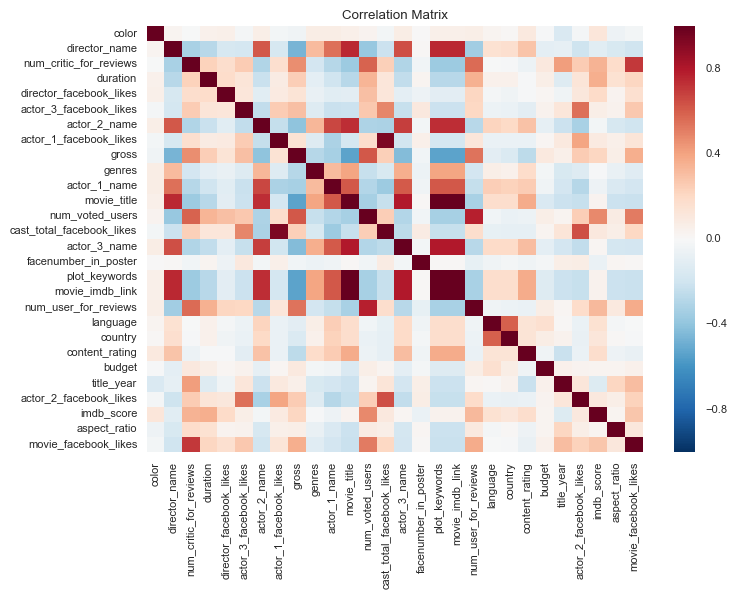

In [49]:
%matplotlib inline
corr = df.corr()
sns.set(font_scale=0.8)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
ax = plt.axes()
ax.set_title('Correlation Matrix')

Positive correlations are displayed in red and negative correlations in blue color. Color intensity is proportional to the correlation coefficients. In the right side of the heatmap, the legend color shows the correlation coefficients and the corresponding colors.

Plot keywords and imdb_link were both removed as they were found to be highly correlated to movie title. The cleaned data set consists of 3,756 movies and 23 different variables. The output we are trying to predict is the imdb_score. 

## Linear Regression

Linear regression is the most basic and commonly used predictive analysis.  Regression estimates are used to describe data and to explain the relationship between one dependent variable and one or more independent variables.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

In [67]:
##read the data set
df=pd.read_csv('/home/data/MSA8010/msa8010f16t02/movie_v4.csv')

In [68]:
x = df.drop(['Unnamed: 0','imdb_score','cast_total_facebook_likes','plot_keywords','movie_imdb_link','movie_title'], axis=1)
x

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,0,0,723,178,0,855,0,1000,760505847,0,...,0,3054,0,0,0,237000000,2009,936,1.78,33000
1,0,1,302,169,563,1000,1,40000,309404152,1,...,0,1238,0,0,0,300000000,2007,5000,2.35,0
2,0,2,602,148,0,161,2,11000,200074175,2,...,1,994,0,1,0,245000000,2015,393,2.35,85000
3,0,3,813,164,22000,23000,3,27000,448130642,3,...,0,2701,0,0,0,250000000,2012,23000,2.35,164000
4,0,4,462,132,475,530,4,640,73058679,4,...,1,738,0,0,0,263700000,2012,632,2.35,24000
5,0,5,392,156,0,4000,5,24000,336530303,5,...,0,1902,0,0,0,258000000,2007,11000,2.35,0
6,0,6,324,100,15,284,6,799,200807262,6,...,1,387,0,0,1,260000000,2010,553,1.85,29000
7,0,7,635,141,0,19000,7,26000,458991599,4,...,4,1117,0,0,0,250000000,2015,21000,2.35,118000
8,0,8,375,153,282,10000,8,25000,301956980,7,...,3,973,0,1,1,250000000,2009,11000,2.35,10000
9,0,9,673,183,0,2000,9,15000,330249062,4,...,0,3018,0,0,0,250000000,2016,4000,2.35,197000


In [69]:
y = df['imdb_score']
y

0       7.9
1       7.1
2       6.8
3       8.5
4       6.6
5       6.2
6       7.8
7       7.5
8       7.5
9       6.9
10      6.1
11      6.7
12      7.3
13      6.5
14      7.2
15      6.6
16      8.1
17      6.7
18      6.8
19      7.5
20      7.0
21      6.7
22      7.9
23      6.1
24      7.2
25      7.7
26      8.2
27      5.9
28      7.0
29      7.8
       ... 
3726    6.3
3727    7.9
3728    7.4
3729    7.5
3730    7.5
3731    6.7
3732    4.2
3733    7.0
3734    7.0
3735    6.8
3736    6.6
3737    7.5
3738    5.3
3739    7.3
3740    5.6
3741    5.6
3742    6.6
3743    6.3
3744    7.5
3745    7.6
3746    7.8
3747    7.3
3748    5.7
3749    7.1
3750    6.1
3751    6.9
3752    7.5
3753    7.0
3754    6.9
3755    6.6
Name: imdb_score, dtype: float64

It is easy to build a linear regression model using the whole dataset. If we build it that way, there is no way to tell how the model will perform with new data. So we split dataset into a 60:40 sample (training:test).
We build the model on the 60 % of the sample and then use the model thus built to predict the dependent variable on test data.
We got the predicted values for the 40 % data (test) as well as the actuals (from the original dataset). By calculating error rates (MSE), we can find out the model significance.

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.4, random_state=42)

In [71]:
regr = linear_model.LinearRegression()

In [72]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(x_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test,y_test))

('Coefficients: \n', array([  2.86485923e-01,  -8.77417227e-05,   2.64254570e-03,
         1.16127799e-02,   9.16816209e-06,  -2.76082603e-05,
         1.53005668e-05,   1.61140426e-06,  -7.82645726e-10,
         2.60384390e-04,  -9.08908877e-07,   3.61088683e-06,
         2.16224301e-04,  -1.68913855e-02,  -5.94620735e-04,
         3.99635397e-02,   1.13387042e-02,   5.94477440e-02,
        -9.71625298e-11,  -1.55356830e-02,   4.04041873e-06,
        -2.82325703e-02,  -3.35236690e-06]))
Mean squared error: 0.73
Variance score: 0.38


The R squared value is showing a definitive amount of variance between the predicted and test data. Only 42 % of the error  can be  explained by the linear regression model.

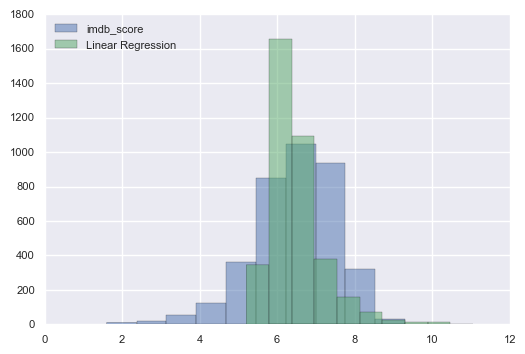

In [75]:
%matplotlib inline
fig = plt.figure()
bins = np.linspace(-10, 10, 100)
plt.hist(y,alpha=0.5,label='imdb_score')
plt.hist(regr.predict(x),alpha=0.5,label='Linear Regression')
plt.legend(loc='upper left')
plt.show()

The Linear Regression gives a distributed performance , predicting well for some range but adding false predictions  along some. The most  important predictor was found to be the cast facebook likes, showing that the popularity of the cast is a determining factor in Imdb ratings.

## Regression Tree

The codes below plots the histogram of simulated (fitted) IMDB Scores vs Test IMDB Scores, and then generates the associated Regression Tree. Before we begin, we need to check if the normalized file named 'movie_v4.csv' has its first column named ‘num’ and upload it to the cluster.

In [ ]:
### Setup for Regression Tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [ ]:
mov = pd.read_csv('movie_v4.csv',encoding='iso-8859-15')

In [ ]:
xvar = set(mov.columns) -set(['num']) - set(['movie_title']) - set(['movie_imdb_link']) - set(['imdb_score'])

In [ ]:
y = mov['imdb_score']

In [ ]:
x = mov[list(xvar)].as_matrix()
xfb = mov[list(fb)].as_matrix()
xrev = mov[list(review)].as_matrix()

In [ ]:
y2 = y.as_matrix()
### End of setup for Regression Tree

In [ ]:
### Scikit-learn with seed = 99
from sklearn.model_selection import train_test_split
x_train, x_test, y2_train, y2_test = train_test_split(x, y2, test_size=.4, random_state=99)
### End of Scikit

In [ ]:
### R2 values for Training set and Test set (Keep running until R2 value for Test set  = 0.361350)
regr = DecisionTreeRegressor(max_depth=5)
regr.fit(x_train,y2_train)

In [ ]:
score_train = regr.score(x_train, y2_train)
score_test = regr.score(x_test, y2_test)
print('Ratio of R-Squared value for:\n\tTraining-set:\t%f\n\tTest-set:\t%f'%(score_train, score_test))
### End of R2 values

In [ ]:
# Generating simulated IMDB Scores
ŷ_all= regr.predict(x_test)
# End of generating simulated IMDB Scores

In [ ]:
# Begin of Plotting histograms of fitted IMDB Scores  and IMDB Scores
%matplotlib inline
fig = plt.figure(figsize=(10,8))

In [ ]:
plt.hist(y2_test, label ='imdb_score_test')
plt.hist(ŷ_all, alpha=0.75, label = 'DecisionTreeRegressor')

In [ ]:
plt.legend(loc='upper left')
fig.suptitle('Fitted Values bs Test IMDB Scores', fontsize=12)
fig.savefig('DecisionTreeRegressor.png')
# End of Plotting histograms of fitted IMDB Scores  and IMDB Scores

In [ ]:
# Beginning of Regression Tree
import sklearn.tree
import pydot_ng as pdot
dot_data = sklearn.tree.export_graphviz(regr, out_file=None, feature_names = list(xvar), class_names=['no', 'yes'])
graph = pdot.graph_from_dot_data(dot_data)

In [ ]:
from IPython.display import HTML
HTML(str(graph.create_svg().decode('utf-8')))
# End of Regression Tree

## Neural Net

The final regression model used was neural nets. All of the necessary functions and packages were loadded along with the data. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_table('/home/data/MSA8010/msa8010f16t02/movie_v4.csv', sep=',')

In [ ]:
Different feature sets were tested. The below was found to be the best. 

In [ ]:
#all_features = set(df.columns)-set(['imdb_score'])-set(['movie_imdb_link'])-set(['Unnamed: 0'])
#all_features = set(df.columns)-set(['imdb_score'])-set(['movie_imdb_link'])-set(['Unnamed: 0'])-set(['facenumber_in_poster'])-set(['actor_3_facebook_likes'])-set(['actor_2_facebook_likes'])-set(['actor_1_facebook_likes'])-set(['color'])-set(['aspect_ratio'])-set(['content_rating'])-set(['cast_total_facebook_likes'])-set(['title_year'])-set(['country'])-set(['movie_facebook_likes'])
all_features = set(df.columns)-set(['imdb_score'])-set(['movie_imdb_link'])-set(['Unnamed: 0'])-set(['facenumber_in_poster'])-set(['actor_3_facebook_likes'])-set(['actor_2_facebook_likes'])-set(['actor_1_facebook_likes'])-set(['color'])-set(['aspect_ratio'])-set(['content_rating'])
all_features

The data was turned into a matrix and the x and y values were separated. Then the x and y were split into testing and training sets. 

In [ ]:
X = df[list(all_features)].as_matrix()
y = df.imdb_score.as_matrix()
X, y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [ ]:
Different models were created and tested. The models were all created individually and then tested. There were 10 different models. 

In [ ]:
# define base mode -- single layer, 13 nodes, 23 features
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=23, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
# model 2 - single layer, 23 nodes, 23 features - try using the same feature total as # of nodes
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(23, input_dim=23, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
# model 3 - 2 layers, 1st with 13 nodes, 2nd with 6, 23 features -- try adding another layer
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=23, init='normal', activation='relu'))
    model.add(Dense(6, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
# model 4 - 2 layers, 1st with 23 nodes, 2nd 11, 23 features -- try adding another layer with more nodes
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(23, input_dim=23, init='normal', activation='relu'))
    model.add(Dense(11, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
# model 5 - single layer, 7 nodes, 23 features -- single layer and less nodes seems to be better, lets try reducing more
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(7, input_dim=23, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
# model 6 - single layer, 5 nodes, 23 features -- that worked, lets keep trying to reduce
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(5, input_dim=23, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
# model 7 - single layer, 3 nodes, 23 features -- worked again, so lets try less
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(3, input_dim=23, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
# model 8 - single layer, 5 nodes, 16 features -- does reducing the number of features help any?
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(5, input_dim=16, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
# model 9 - 3 layers, each with 4 nodes, 16 features -- does it change if we add more layers?
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(4, input_dim=16, init='normal', activation='relu'))
    model.add(Dense(4, init='normal', activation='relu'))
    model.add(Dense(4, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
# model 10 - single layer, 5 nodes, 12 features -- does reducing even more features help again?
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(5, input_dim=12, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
# evaluate model with standardized dataset (this was run 1 time for each of the above models and the results were recorded below)
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X_train, y_train, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

*on full dataset*  
1 Standardized: 0.75 (0.30) MSE  
2 Standardized: 0.99 (1.02) MSE  
3 Standardized: 0.79 (0.41) MSE  
4 Standardized: 0.86 (0.70) MSE  
5 Standardized: 0.67 (0.11) MSE  
6 Standardized: 0.65 (0.09) MSE  
7 Standardized: 0.65 (0.10) MSE  

*on reduced dataset*  
8 Standardized: 0.62 (0.08) MSE  ****the winner****  
9 Standardized: 0.64 (0.08) MSE  
  
*on mega reduced set*  
10 Standardized: 0.64 (0.08) MSE

In [ ]:
# create the actual model from the standardized dataset using the model with the best mse from above. 
model = pipeline.fit(X_train, y_train)

In [ ]:
#score the results
results = model.score(X_test, y_test)
print("Standardized: %.2f MSE" % results)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [ ]:
#find the results of the model on the entire dataset then plot results vs the actual y's 
df['y_hat']=model.predict(X)

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(7,5))
plt.hist(df['imdb_score'], label ='imdb_score')
plt.hist(df['y_hat'], alpha=0.75, label = 'neural net')
plt.legend(loc='upper left')
fig.savefig('neural_net.png')

## LOGISTIC REGRESSION

Logistic Regression was the first classification model used for predicting the IMDb score of a movie. The code below is the first method used in python to obtain a summary of the regression output. From the movie data set on the cluster, the target feature was established as imdb_score. Of all the scores given in the data set, the average was found and used to separate the y-variable into two categories: if the score was greater than or equal to the mean, it would be labeled as "1" for good; if the score was below the mean, it would be labeled as "0" to represent bad. Then, the full data set was separated into a training set composed of 60% of the data and a testing set composed of the remaining 40% of the data. The training data was used to fit the regression model, and the summary output was generated. Predicted values were also calculated which, when compared with testing data values, can be used to find the error percentage of the model. The code is presented in the order of implementation:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import patsy
from sklearn import linear_model, decomposition, datasets

In [2]:
## retrieve file and instantiate data set
movies = pd.read_csv('/home/data/MSA8010/msa8010f16t02/movie_v4.csv')

In [3]:
## find average IMDb score
avg = movies['imdb_score'].mean()

In [4]:
## categorize imdb scores as either 0 or 1
movies['imdb_score'] = (movies['imdb_score'] > movies['imdb_score'].mean()).astype(int)

In [5]:
## split data into 60% training and 40% testing
training_rows = movies.sample(frac=0.6)
testing_rows = movies.loc[~movies.index.isin(training_rows.index)]

In [6]:
## set y2 and X2
y2, X2 = patsy.dmatrices('imdb_score ~ color + director_name + num_critic_for_reviews + duration + director_facebook_likes + actor_3_facebook_likes + actor_2_name + actor_1_facebook_likes + genres + actor_1_name + movie_title + num_voted_users + cast_total_facebook_likes + actor_3_name + facenumber_in_poster + movie_imdb_link + num_user_for_reviews + language + country + content_rating + title_year + actor_2_facebook_likes + aspect_ratio + movie_facebook_likes', training_rows, return_type = 'dataframe')

In [7]:
## fit logistic regression model to binary data
logit2 = sm.Logit(y2, X2)
result = logit2.fit()

Optimization terminated successfully.
         Current function value: 0.469374
         Iterations 8


In [8]:
## get summary output of logit regression
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             imdb_score   No. Observations:                 2254
Model:                          Logit   Df Residuals:                     2229
Method:                           MLE   Df Model:                           24
Date:                Thu, 08 Dec 2016   Pseudo R-squ.:                  0.3171
Time:                        00:26:08   Log-Likelihood:                -1058.0
converged:                       True   LL-Null:                       -1549.3
                                        LLR p-value:                4.130e-192
=============================================================================================
                                coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                    35.1758     15.553      2.262      0.024         4.692    65.660
color                         0.6736      0.335      2.012      0.044         0.017     1.330
director_name                -0.0006      0.000     -3.150      0.002        -0.001    -0.000
num_critic_for_reviews        0.0024      0.001      2.490      0.013         0.001     0.004
duration                      0.0404      0.004     10.547      0.000         0.033     0.048
director_facebook_likes    4.277e-05    2.4e-05      1.784      0.074     -4.23e-06  8.98e-05
actor_3_facebook_likes        0.0002   9.11e-05      2.565      0.010      5.51e-05     0.000
actor_2_name                 -0.0003      0.000     -2.158      0.031        -0.001  -2.7e-05
actor_1_facebook_likes        0.0002    5.4e-05      4.574      0.000         0.000     0.000
genres                        0.0002      0.000      0.556      0.579        -0.000     0.001
actor_1_name                 -0.0004      0.000     -2.036      0.042        -0.001 -1.45e-05
movie_title                  -0.2289      0.195     -1.171      0.241        -0.612     0.154
num_voted_users            2.017e-05    1.6e-06     12.567      0.000       1.7e-05  2.33e-05
cast_total_facebook_likes    -0.0002   5.39e-05     -4.566      0.000        -0.000    -0.000
actor_3_name              -1.526e-05      0.000     -0.125      0.901        -0.000     0.000
facenumber_in_poster         -0.0890      0.027     -3.343      0.001        -0.141    -0.037
movie_imdb_link               0.2301      0.195      1.178      0.239        -0.153     0.613
num_user_for_reviews         -0.0024      0.000     -8.070      0.000        -0.003    -0.002
language                      0.1794      0.055      3.277      0.001         0.072     0.287
country                       0.0062      0.016      0.400      0.689        -0.024     0.037
content_rating                0.0565      0.037      1.513      0.130        -0.017     0.130
title_year                   -0.0207      0.008     -2.663      0.008        -0.036    -0.005
actor_2_facebook_likes        0.0003   5.94e-05      4.356      0.000         0.000     0.000
aspect_ratio                 -0.2222      0.223     -0.999      0.318        -0.658     0.214
movie_facebook_likes       1.114e-06   5.09e-06      0.219      0.827     -8.86e-06  1.11e-05
=============================================================================================
"""

In [9]:
#predicted_values 
predicted_values = result.predict(X2)
predicted_values2 = predicted_values.round()
predicted_values2[1:10]

array([ 0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  0.])

In the following code, scikit-learn was used as an alternative method of python code for logistic regression. All the x-variables were split into numerical and categorical features, and the mean was found for the y-variable again for the purpose of separating the values into good vs. bad with "1" or "0", respectively. The data was again split with 60% for training and 40% for testing. The ratio was fit to the data, then the ratio of correctly classified samples was calculated for both training data (0.767421) and testing data (0.748503). Predicted values using testing data were found, and using a function to compare them with score data yielded a binary confusion matrix with values for true positives, true negatives, false positives, and false negatives. A classification report was generated to see the precision, recall, F1-score, and support of the model. Finally, a function was written to create a visual normalized confusion matrix with rates in the quadrants. 

In [6]:
## separate x features into numerical, categorical, and all features (not imdb_score)
all_features = set(movies.columns)-set(['imdb_score'])
num_features = set(movies.describe().columns)
cat_features = all_features-num_features

In [11]:
## categorize imdb_score values to be 0 or 1
movies['imdb_score'] = (movies['imdb_score'] > movies['imdb_score'].mean()).astype(int)

In [12]:
X = movies[list(all_features)].as_matrix()
y = movies.imdb_score.as_matrix()
X, y

(array([[  0.0e+00,   1.0e+03,   0.0e+00, ...,   0.0e+00,   0.0e+00,
           8.9e+05],
        [  5.6e+02,   4.0e+04,   1.0e+00, ...,   1.0e+00,   1.0e+00,
           4.7e+05],
        [  0.0e+00,   1.1e+04,   2.0e+00, ...,   2.0e+00,   2.0e+00,
           2.8e+05],
        ..., 
        [  2.9e+02,   2.9e+02,   1.7e+03, ...,   5.0e+03,   2.6e+03,
           7.3e+04],
        [  0.0e+00,   1.2e+02,   4.0e+02, ...,   5.0e+03,   2.6e+03,
           5.2e+04],
        [  1.6e+01,   8.6e+01,   1.6e+03, ...,   5.0e+03,   2.6e+03,
           4.3e+03]]), array([ 7.9,  7.1,  6.8, ...,  7. ,  6.9,  6.6]))

In [13]:
## split data into 60% training and 40% testing, as well as X and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

In [14]:
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [15]:
## fit logistic regression model
logistic = linear_model.LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
## generate ratio for samples that are correctly classified, both training and testing
score_train = logistic.score(X_train, y_train)
score_test = logistic.score(X_test, y_test)
print('Ratio of correctly classified samples for:\n\tTraining-set:\t%f\n\tTest-set:\t%f'%(score_train, score_test))

Ratio of correctly classified samples for:
	Training-set:	0.767421
	Test-set:	0.748503


In [17]:
## predicted values
ŷ = logistic.predict(X_test)

In [18]:
## generate confusion matrix with total values for TP, TN, FP, FN
def binary_confusion_matrix(y,ŷ):
    TP = ((y+ŷ)== 2).sum()
    TN = ((y+ŷ)== 0).sum()
    FP = ((y-ŷ)== -1).sum()
    FN = ((y-ŷ)== 1).sum()
    return pd.DataFrame( [[TP, FP], [FN, TN]], index=[['Prediction', 'Prediction'],['True', 'False']], columns=[['Actual', 'Actual'],['True', 'False']])

cm = binary_confusion_matrix(y_test, ŷ)
cm

Actual      
                   True False
Prediction True     626   170
           False    208   499

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ŷ)
cm

array([[499, 170],
       [208, 626]])

In [20]:
## generate table with rates for precision, recall, F1-score, and support
from sklearn.metrics import classification_report
print(classification_report(y_test, ŷ))

             precision    recall  f1-score   support

          0       0.71      0.75      0.73       669
          1       0.79      0.75      0.77       834

avg / total       0.75      0.75      0.75      1503



In [21]:
## define function to generate visual confusion matrix
import itertools
np.set_printoptions(precision=2)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[ 0.75  0.25]
 [ 0.25  0.75]]


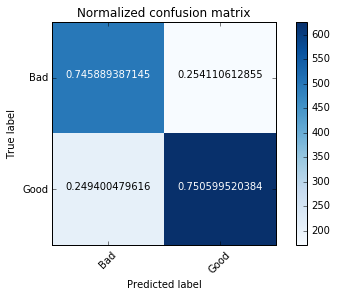

In [22]:
## generate/plot normalized confusion matrix with rates for 2 classes: good vs. bad
%matplotlib inline

fig = plt.figure()
plot_confusion_matrix(cm, classes=['Bad', 'Good'], normalize=True, title='Normalized confusion matrix')
plt.show()

## Random Forest

We built 2 classification models using Random Forest , first having 3 categories for y (Bad,Average,Good) and the second having 2 (Good,Bad) categories, using the same criteria as used above for Logistic Regression:-Taking average of IMDB score and using the average to put them in different categories).Again, using the similar logic, as used in Logistic Regression, divided the data set in 60%-40% ratio and trained & predicted using the rspective datasets.The Classification report and Confusion matrix for both the models shown below along with the code(orderwise).


### 1st Random Forest Model : 3 categories for y (IMDB Score)

In [3]:
df_num=movies.copy()
for i in df_num.imdb_score:
    if i <= 4:
        df_num.imdb_score.replace({i:"B"}, inplace=True)
    elif 4<i<=6.9:
        df_num.imdb_score.replace({i:"A"}, inplace=True)
    elif i>6.9:
        df_num.imdb_score.replace({i:"G"}, inplace=True)

1.Subsetting x and y and splitting the data for training and testing #                                         
2.Creating a classifier to train and then predicting y for test data set

In [7]:
x = df_num[list(all_features)].as_matrix()
y = df_num.imdb_score.as_matrix()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.4, random_state=42)
rf = RandomForestClassifier(n_estimators=100)
rf=rf.fit(x_train, y_train)
y_hat=rf.predict(x_test)

Classification Report for the 1st(RF) model:

In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_hat)
print(classification_report(y_test, y_hat))

             precision    recall  f1-score   support

          A       0.77      0.91      0.84       935
          B       0.00      0.00      0.00        46
          G       0.79      0.61      0.69       522

avg / total       0.76      0.78      0.76      1503



/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion Matrix for the 1st(Random Forest) Model : 

Normalized confusion matrix
[[ 0.9  0.   0.1]
 [ 1.   0.   0. ]
 [ 0.4  0.   0.6]]


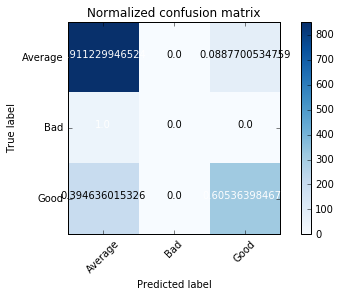

In [9]:
import itertools
np.set_printoptions(precision=1)
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation=45)
   plt.yticks(tick_marks, classes)

   if normalize:
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       print("Normalized confusion matrix")
   else:
       print('Confusion matrix, without normalization')

   print(cm)

   thresh = cm.max() / 2.
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
       plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

   plt.tight_layout()
   plt.ylabel('True label')
   plt.xlabel('Predicted label')


%matplotlib inline

fig = plt.figure()
plot_confusion_matrix(cm, classes=['Average','Bad', 'Good'], normalize=True, title='Normalized confusion matrix')
plt.show()
#plt.savefig('/home/data/MSA8010/msa8010f16t02/RF_CM_PLT1.png')


### 2nd Random Forest Model : 2 categories for y (IMDB Score)

In [14]:
df_num1=movies.copy()
for i in df_num1.imdb_score:
    if i<6.4:
        df_num1.imdb_score.replace({i:"B"}, inplace=True)
    elif i>=6.4:
        df_num1.imdb_score.replace({i:"G"}, inplace=True)

        
x1 = df_num1[list(all_features)].as_matrix()
y1 = df_num1.imdb_score.as_matrix()

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=.4, random_state=42)
rf1 = RandomForestClassifier(n_estimators=100)
rf1=rf1.fit(x_train1, y_train1)


Classification Report for the 2nd Model :

In [15]:
y_hat1=rf1.predict(x_test1)
cm2 = confusion_matrix(y_test1, y_hat1)
print(classification_report(y_test1, y_hat1))


             precision    recall  f1-score   support

          B       0.74      0.71      0.72       606
          G       0.81      0.83      0.82       897

avg / total       0.78      0.78      0.78      1503



Confusion Matrix for the 2nd Model :

Normalized confusion matrix
[[ 0.7  0.3]
 [ 0.2  0.8]]


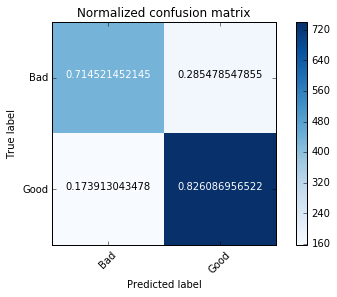

In [16]:
fig = plt.figure()
plot_confusion_matrix(cm2, classes=['Bad', 'Good'], normalize=True, title='Normalized confusion matrix')
plt.show()


## Conclusion